In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import 

In [2]:
df = pd.read_csv('E:\Downloads\SOCIAL Drive - Downloads\Files\Files\home\jovyan\work\eda_outliers_dataset1.csv')
df.head()

,year,number_of_strikes
0,2020,15620068
1,2019,209166
2,2018,44600989
3,2017,35095195
4,2016,41582229


In [3]:
def readable_numbers(x):
    """takes a large number and formats it into K,M to make it more readable"""
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

# Use the readable_numbers() function to create a new column 
df['number_of_strikes_readable']=df['number_of_strikes'].apply(readable_numbers)

In [4]:
df.head(10)

,year,number_of_strikes,number_of_strikes_readable
0,2020,15620068,15.6M
1,2019,209166,209K
2,2018,44600989,44.6M
3,2017,35095195,35.1M
4,2016,41582229,41.6M
5,2015,37894191,37.9M
6,2014,34919173,34.9M
7,2013,27600898,27.6M
8,2012,28807552,28.8M
9,2011,31392058,31.4M


In [5]:
print("Mean:", readable_numbers(np.mean(df['number_of_strikes'])))
print("Median:", readable_numbers(np.median(df['number_of_strikes'])))
# Since the mean is less than the median, our graph is prolly left skewed.

Mean: 26.8M
Median: 28.3M


C:\Users\CWC\AppData\Local\Temp\ipykernel_12924\2514667445.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))


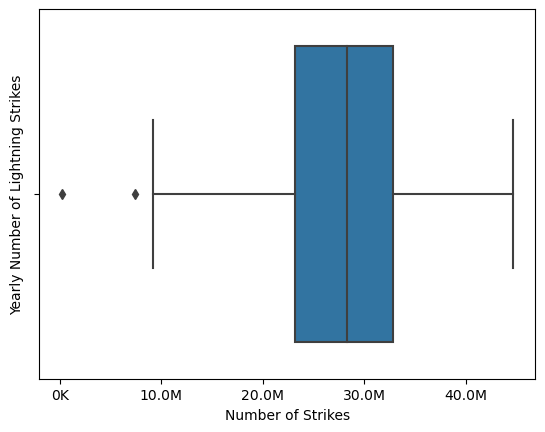

In [6]:
box = sns.boxplot(x='number_of_strikes', data=df)
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel("Number of Strikes")
plt.ylabel("Yearly Number of Lightning Strikes")
plt.show()

In [7]:
# Calculate 25th Percentile for lightning Strikes
percentile25 = df['number_of_strikes'].quantile(1/4)

# Calculate 75th Percentile for lightning Strikes
percentile75 = df['number_of_strikes'].quantile(3/4)

In [8]:
# Calculate Interquartile Range
iqr = percentile75 - percentile25

# Calculate Upper and Lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [9]:
print('Lower Limit is:', readable_numbers(lower_limit))
print('Upper Limit is:', readable_numbers(upper_limit))

Lower Limit is: 8.6M
Upper Limit is: 47.4M


In [10]:
df[df['number_of_strikes'] < lower_limit]

,year,number_of_strikes,number_of_strikes_readable
1,2019,209166,209K
33,1987,7378836,7.4M


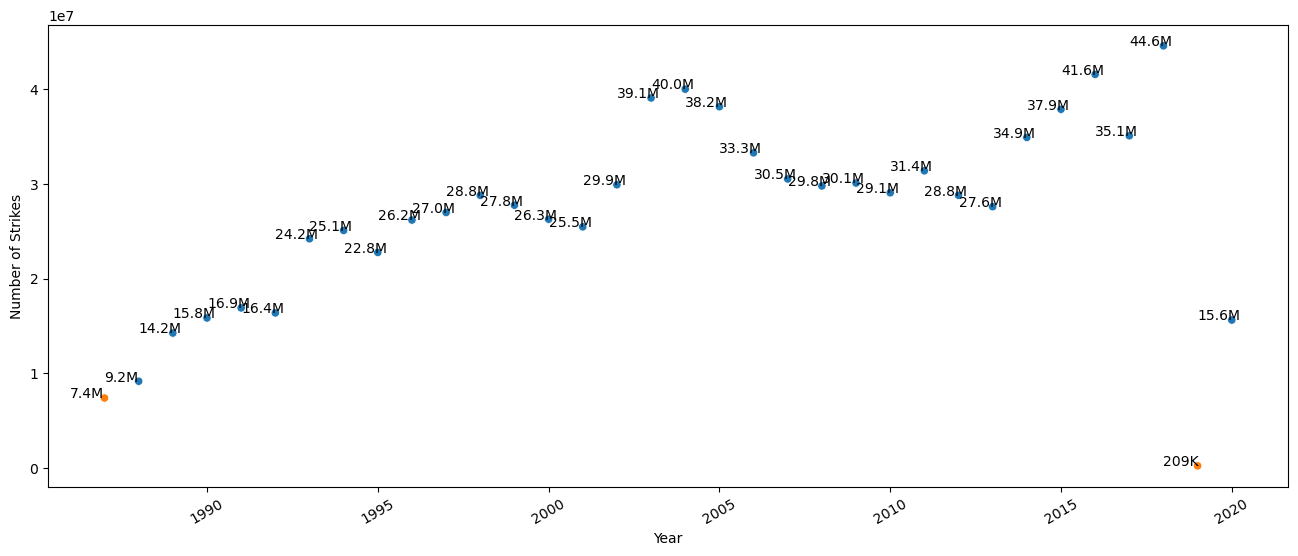

In [ ]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(x[i] - 1, y[i] + 1, s=readable_numbers(y[i]))

colors = np.where(df['number_of_strikes'] < lower_limit, 'red', 'blue')

plt.figure(figsize=(16,6))        
sns.scatterplot(x='year', y='number_of_strikes', data=df, 
                hue=colors, 
                legend=False)
add_labels(df['year'], df['number_of_strikes'])
plt.xticks(rotation=30)
plt.xlabel('Year')
plt.ylabel('Number of Strikes')
plt.show()

## NEW DATASET

In [14]:
df_2019 = pd.read_csv('E:\Downloads\SOCIAL Drive - Downloads\Files\Files\home\jovyan\work\eda_outliers_dataset2.csv')
# df_2019.head()

df_2019['date'] = pd.to_datetime(df_2019['date'])

# Create 2 new Columns
df_2019['month'] = df_2019['date'].dt.month
df_2019['month_txt'] = df_2019['date'].dt.month_name().str[:3]

In [15]:
df_2019.head()

,date,number_of_strikes,center_point_geom,month,month_txt
0,2019-12-01,1,POINT(-79.7 35.3),12,Dec
1,2019-12-01,1,POINT(-84.7 39.3),12,Dec
2,2019-12-01,1,POINT(-83.4 38.9),12,Dec
3,2019-12-01,1,POINT(-71.5 35.2),12,Dec
4,2019-12-01,1,POINT(-87.8 41.6),12,Dec


In [18]:
df_2019.groupby(['month_txt', 'month'])[['number_of_strikes']].sum().reset_index()

,month_txt,month,number_of_strikes
0,Dec,12,209166


In [23]:
df_1987 = pd.read_csv('E:\Downloads\SOCIAL Drive - Downloads\Files\Files\home\jovyan\work\eda_outliers_dataset3.csv')
# df_2019.head()

df_1987['date'] = pd.to_datetime(df_1987['date'])

# Create 2 new Columns
df_1987['month'] = df_1987['date'].dt.month
df_1987['month_txt'] = df_1987['date'].dt.month_name().str[:3]

df_1987_by_month = df_1987.groupby(['month_txt', 'month'])['number_of_strikes'].sum() \
                    .reset_index(name='Total Strikes') \
                    .sort_values(by='month')

In [31]:
df_without_outliers = df[df['number_of_strikes'] >= lower_limit]

print("Mean:", readable_numbers(np.mean(df_without_outliers['number_of_strikes'])))
print("Median:", readable_numbers(np.median(df_without_outliers['number_of_strikes'])))

Mean: 28.2M
Median: 28.8M
